In [1]:
import gym
import numpy as np
import random
from collections import defaultdict

In [2]:
env = gym.make("Taxi-v3")

In [3]:
class SARSAAgent:
    def __init__(self, n_actions, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.q_table = defaultdict(lambda: np.zeros(n_actions))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_actions = n_actions

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.n_actions)  # Explore
        else:
            return np.argmax(self.q_table[state])    # Exploit

    def update(self, state, action, reward, next_state, next_action):
        current_q = self.q_table[state][action]
        next_q = self.q_table[next_state][next_action]
        target = reward + self.gamma * next_q
        self.q_table[state][action] += self.alpha * (target - current_q)


In [4]:
class SARSAAgent:
    def __init__(self, n_actions, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.q_table = defaultdict(lambda: np.zeros(n_actions))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_actions = n_actions

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.n_actions)  # Explore
        else:
            return np.argmax(self.q_table[state])    # Exploit

    def update(self, state, action, reward, next_state, next_action):
        current_q = self.q_table[state][action]
        next_q = self.q_table[next_state][next_action]
        target = reward + self.gamma * next_q
        self.q_table[state][action] += self.alpha * (target - current_q)


In [5]:
def train_agent(env, agent, num_episodes):
    for episode in range(num_episodes):
        state, _ = env.reset()
        action = agent.choose_action(state)
        done = False

        while not done:
            next_state, reward, done, truncated, _ = env.step(action)
            next_action = agent.choose_action(next_state)
            agent.update(state, action, reward, next_state, next_action)
            state = next_state
            action = next_action

            if done or truncated:
                break


In [6]:
def evaluate_agent(env, agent, num_episodes):
    total_rewards = 0
    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_reward = 0

        while not done:
            action = agent.choose_action(state)
            next_state, reward, done, truncated, _ = env.step(action)
            episode_reward += reward
            state = next_state

            if done or truncated:
                break

        total_rewards += episode_reward

    average_reward = total_rewards / num_episodes
    return average_reward


In [7]:
if __name__ == "__main__":
    n_actions = env.action_space.n
    agent = SARSAAgent(n_actions)

    num_training_episodes = 10000
    train_agent(env, agent, num_training_episodes)

    num_evaluation_episodes = 100
    average_reward = evaluate_agent(env, agent, num_evaluation_episodes)
    print(f"Average Reward over {num_evaluation_episodes} episodes: {average_reward}")


C:\Users\SATHVIK\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Average Reward over 100 episodes: 2.17


C:\Users\SATHVIK\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


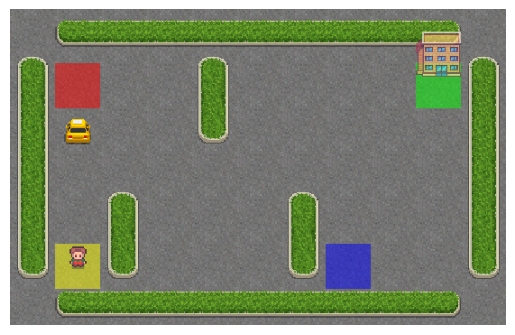

In [8]:
import gym
import matplotlib.pyplot as plt

# Create the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode="rgb_array")

# Initialize variables
frames = []  # To store frames for visualization
observation, info = env.reset()  # Reset the environment

for t in range(1000):
    # Render the environment and append the frame
    frame = env.render()
    frames.append(frame)

    # Take a random action
    action = env.action_space.sample()
    observation, reward, done, truncated, info = env.step(action)

    # If episode ends, exit the loop
    if done or truncated:
        break

env.close()

# Display the last frame
plt.imshow(frames[-1])
plt.axis("off")
plt.show()


In [9]:
def evaluate_agent(env, agent, num_episodes):
    episode_frames = []
    
    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_frames.append(env.render(mode="ansi"))  # Ensure text rendering
        
        while not done:
            action = np.argmax(agent.q_table[state])
            state, reward, terminated, truncated, _ = env.step(action)
            episode_frames.append(env.render(mode="ansi"))  # Fix rendering
            done = terminated or truncated

    return episode_frames



In [10]:
def animate_taxi(frames):
    fig, ax = plt.subplots(figsize=(6, 6))
    text = ax.text(0.5, 0.5, "", fontsize=12, family="monospace", va="center", ha="center")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")

    def update(i):
        text.set_text(frames[i])  # Display text-based environment state
    
    ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=500)
    plt.show()
env.close()


In [11]:

import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from gym import spaces

class CustomTaxiEnv(gym.Env):
    def __init__(self, grid_size=5):
        super(CustomTaxiEnv, self).__init__()

        self.grid_size = grid_size
        self.action_space = spaces.Discrete(4)  # Up, Down, Left, Right
        self.observation_space = spaces.Discrete(grid_size * grid_size)

        self.taxi_pos = [0, 0]  # Start at top-left
        self.passenger_pos = [random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)]
        self.destination = [random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)]

        self.obstacles = {(1, 2), (2, 2), (3, 2)}  # Roadblocks in the city

    def reset(self):
        self.taxi_pos = [0, 0]
        self.passenger_pos = [random.randint(0, self.grid_size - 1), random.randint(0, self.grid_size - 1)]
        self.destination = [random.randint(0, self.grid_size - 1), random.randint(0, self.grid_size - 1)]
        return self.encode_state()

    def encode_state(self):
        return self.taxi_pos[0] * self.grid_size + self.taxi_pos[1]

    def step(self, action):
        x, y = self.taxi_pos

        if action == 0 and x > 0:  # Move Up
            x -= 1
        elif action == 1 and x < self.grid_size - 1:  # Move Down
            x += 1
        elif action == 2 and y > 0:  # Move Left
            y -= 1
        elif action == 3 and y < self.grid_size - 1:  # Move Right
            y += 1

        if (x, y) in self.obstacles:  # Prevent moving into obstacles
            reward = -5
        else:
            self.taxi_pos = [x, y]
            reward = -1  # Default step penalty

        done = False
        if self.taxi_pos == self.passenger_pos:
            reward += 10  # Picked up the passenger
        if self.taxi_pos == self.destination:
            reward += 20  # Dropped off the passenger
            done = True

        return self.encode_state(), reward, done, {}

    def render(self):
        grid = [[" . " for _ in range(self.grid_size)] for _ in range(self.grid_size)]

        for x, y in self.obstacles:
            grid[x][y] = " X "  # Obstacles
        
        grid[self.passenger_pos[0]][self.passenger_pos[1]] = " P "  # Passenger
        grid[self.destination[0]][self.destination[1]] = " D "  # Destination
        grid[self.taxi_pos[0]][self.taxi_pos[1]] = " T "  # Taxi

        return "\n".join(["".join(row) for row in grid])



In [12]:

class SARSAAgent:
    def __init__(self, n_actions, alpha=0.1, gamma=0.99, epsilon=0.1, decay_rate=0.995):
        self.q_table = defaultdict(lambda: np.zeros(n_actions))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_actions = n_actions
        self.decay_rate = decay_rate

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            return np.argmax(self.q_table[state])

    def update(self, state, action, reward, next_state, next_action):
        current_q = self.q_table[state][action]
        next_q = self.q_table[next_state][next_action] if next_action is not None else 0
        target = reward + self.gamma * next_q
        self.q_table[state][action] += self.alpha * (target - current_q)

    def decay_epsilon(self):
        self.epsilon = max(0.01, self.epsilon * self.decay_rate)

def train_agent(env, agent, num_episodes):
    for episode in range(num_episodes):
        state = env.reset()
        action = agent.choose_action(state)
        done = False

        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = agent.choose_action(next_state) if not done else None
            agent.update(state, action, reward, next_state, next_action)
            state, action = next_state, next_action if next_action is not None else action
            
        agent.decay_epsilon()

In [13]:
def evaluate_agent(env, agent, num_episodes):
    episode_frames = []
    
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        episode_frames.append(env.render())  # Capture initial state
        
        while not done:
            action = np.argmax(agent.q_table[state])
            state, reward, done, _ = env.step(action)
            episode_frames.append(env.render())  # Capture each step

    return episode_frames

In [ ]:
def animate_taxi(frames):
    fig, ax = plt.subplots(figsize=(6, 6))
    text = ax.text(0.5, 0.5, "", fontsize=12, family="monospace", va="center", ha="center")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")

    def update(i):
        text.set_text(frames[i])
    
    ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=500)
    plt.show()

if __name__ == "__main__":
    env = CustomTaxiEnv(grid_size=5)
    n_actions = env.action_space.n
    agent = SARSAAgent(n_actions)

    num_training_episodes = 1000
    train_agent(env, agent, num_training_episodes)

    num_evaluation_episodes = 1
    frames = evaluate_agent(env, agent, num_evaluation_episodes)

    animate_taxi(frames)



In [ ]:
def evaluate_agent(env, agent, num_episodes=1):
    frames = []
    total_rewards = []
    
    for _ in range(num_episodes):
        state = env.reset()
        done = False
        episode_reward = 0

        while not done:
            action = np.argmax(agent.Q[state])
            state, reward, done, _, _ = env.step(action)
            episode_reward += reward
            frames.append(env.render())

        total_rewards.append(episode_reward)

    print(f"Average Reward over {num_episodes} episodes: {np.mean(total_rewards)}")
    return frames

# Visualize the Agent's Navigation
def animate_taxi(frames):
    fig, ax = plt.subplots(figsize=(6, 6))
    text = ax.text(0.5, 0.5, "", fontsize=12, family="monospace", va="center", ha="center")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")

    def update(i):
        text.set_text(frames[i])

    ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=500)
    plt.show()

#  Run Training and Evaluation
if __name__ == "__main__":
    env = CustomTaxiEnv(grid_size=5)
    n_actions = env.action_space.n
    agent = SARSAAgent(n_actions)

    num_training_episodes = 1000
    train_agent(env, agent, num_training_episodes)

    num_evaluation_episodes = 5
    frames = evaluate_agent(env, agent, num_evaluation_episodes)

    animate_taxi(frames)

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import defaultdict

#  Custom Taxi Environment (5x5 Grid)
class CustomTaxiEnv:
    def __init__(self, grid_size=5):
        self.env = gym.make("Taxi-v3", render_mode="ansi")
        self.grid_size = grid_size
        self.action_space = self.env.action_space
        self.observation_space = self.env.observation_space

    def reset(self):
        state, _ = self.env.reset()
        return state

    def step(self, action):
        return self.env.step(action)

    def render(self):
        return self.env.render()

#  SARSA Agent
class SARSAAgent:
    def __init__(self, n_actions, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = defaultdict(lambda: np.zeros(n_actions))

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.n_actions)  # Explore
        else:
            return np.argmax(self.Q[state])  # Exploit

    def update(self, state, action, reward, next_state, next_action, done):
        target = reward + (0 if done else self.gamma * self.Q[next_state][next_action])
        self.Q[state][action] += self.alpha * (target - self.Q[state][action])

#  Train the Agent using SARSA
def train_agent(env, agent, num_episodes=1000):
    for episode in range(num_episodes):
        state = env.reset()
        action = agent.select_action(state)
        done = False

        while not done:
            next_state, reward, done, _, _ = env.step(action)
            next_action = agent.select_action(next_state)
            agent.update(state, action, reward, next_state, next_action, done)
            state, action = next_state, next_action

# Evaluate the Agent
def evaluate_agent(env, agent, num_episodes=1):
    frames = []
    total_rewards = []
    
    for _ in range(num_episodes):
        state = env.reset()
        done = False
        episode_reward = 0

        while not done:
            action = np.argmax(agent.Q[state])
            state, reward, done, _, _ = env.step(action)
            episode_reward += reward
            frames.append(env.render())

        total_rewards.append(episode_reward)

    print(f"Average Reward over {num_episodes} episodes: {np.mean(total_rewards)}")
    return frames
# Visualize the Agent's Navigation
def animate_taxi(frames):
    fig, ax = plt.subplots(figsize=(6, 6))
    text = ax.text(0.5, 0.5, "", fontsize=12, family="monospace", va="center", ha="center")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")

    def update(i):
        text.set_text(frames[i])

    ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=500)
    plt.show()

#  Run Training and Evaluation
if __name__ == "__main__":
    env = CustomTaxiEnv(grid_size=5)
    n_actions = env.action_space.n
    agent = SARSAAgent(n_actions)

    num_training_episodes = 1000
    train_agent(env, agent, num_training_episodes)

    num_evaluation_episodes = 5
    frames = evaluate_agent(env, agent, num_evaluation_episodes)

    animate_taxi(frames)


In [ ]:

def evaluate_agent(env, agent, num_episodes=10):
    total_rewards = []
    total_steps = []
    frames = []

    for _ in range(num_episodes):
        state = env.reset()
        done = False
        episode_reward = 0
        steps = 0
        episode_frames = []

        while not done:
            action = np.argmax(agent.Q[state])
            state, reward, done, _, _ = env.step(action)
            episode_frames.append(env.render())
            episode_reward += reward
            steps += 1

        total_rewards.append(episode_reward)
        total_steps.append(steps)
        frames.extend(episode_frames)

    print(f"\n Evaluation Summary over {num_episodes} episodes:")
    print(f"Average Reward: {np.mean(total_rewards):.2f}")
    print(f"Average Steps per Episode: {np.mean(total_steps):.2f}")
    print(f"Max Reward: {np.max(total_rewards)}")
    print(f"Min Reward: {np.min(total_rewards)}")
    
    return frames, total_rewards, total_steps

#  Visualization Function
def plot_metrics(rewards, steps):
    episodes = np.arange(len(rewards))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(episodes, rewards, label='Reward per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Episode Rewards')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(episodes, steps, color='orange', label='Steps per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Episode Length')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Animation Function
def animate_taxi(frames):
    fig, ax = plt.subplots(figsize=(6, 6))
    text = ax.text(0.5, 0.5, "", fontsize=12, family="monospace", va="center", ha="center")
    ax.set_xticks([]); ax.set_yticks([]); ax.axis("off")

    def update(i):
        text.set_text(frames[i])

    ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=500)
    plt.show()

#  Run Full Pipeline
if __name__ == "__main__":
    env = CustomTaxiEnv()
    agent = SARSAAgent(n_actions=env.action_space.n)

    # Train
    print("Training agent...")
    train_rewards, train_steps = train_agent(env, agent, num_episodes=1000)

    # Plot training metrics
    plot_metrics(train_rewards, train_steps)

    # Evaluate
    print("\nEvaluating agent...")
    frames, eval_rewards, eval_steps = evaluate_agent(env, agent, num_episodes=5)

    # Show animation
    animate_taxi(frames)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics(rewards, steps):
    episodes = np.arange(len(rewards))

    plt.figure(figsize=(14, 5))

    # Plot 1: Rewards per episode
    plt.subplot(1, 2, 1)
    plt.plot(episodes, rewards, label='Reward per Episode', color='royalblue')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Training Rewards over Episodes')
    plt.grid(True)
    plt.legend()

    # Plot 2: Steps per episode
    plt.subplot(1, 2, 2)
    plt.plot(episodes, steps, label='Steps per Episode', color='darkorange')
    plt.xlabel('Episode')
    plt.ylabel('Number of Steps')
    plt.title('Episode Lengths over Episodes')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
rewards, steps = train_agent(env, agent, num_episodes=1000)
plot_metrics(rewards, steps)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_metrics(avg_rewards, success_rate, accuracy, steps, test_accuracy, validation_loss):
    """
    Plots training, test, and validation metrics on a 3x2 grid.
    
    Parameters:
    - avg_rewards: array of average rewards per episode.
    - success_rate: array of success rates per episode.
    - accuracy: array of accuracy values per episode.
    - steps: array of steps per episode.
    - test_accuracy: array of test accuracy values.
    - validation_loss: array of validation loss values.
    """
    episodes = np.arange(1, len(avg_rewards) + 1)

    # Create a 3x2 grid of subplots
    fig, axs = plt.subplots(3, 2, figsize=(14, 15))
    fig.suptitle("Training, Test, and Validation Metrics Over Episodes", fontsize=16, fontweight='bold')

    # --- Plot 1: Average Episode Reward ---
    axs[0, 0].plot(episodes, avg_rewards, color='royalblue', linewidth=2, label='Avg Reward')
    axs[0, 0].axhline(np.mean(avg_rewards), color='gray', linestyle='--', label='Mean')
    axs[0, 0].set_title('Average Episode Reward', fontsize=12)
    axs[0, 0].set_xlabel('Episodes')
    axs[0, 0].set_ylabel('Reward')
    axs[0, 0].grid(True, linestyle='--', alpha=0.6)
    axs[0, 0].legend()

    # --- Plot 2: Success Rate ---
    axs[0, 1].plot(episodes, success_rate, color='seagreen', linewidth=2, label='Success Rate')
    axs[0, 1].axhline(np.mean(success_rate), color='gray', linestyle='--', label='Mean')
    axs[0, 1].set_title('Success Rate', fontsize=12)
    axs[0, 1].set_xlabel('Episodes')
    axs[0, 1].set_ylabel('Rate')
    axs[0, 1].grid(True, linestyle='--', alpha=0.6)
    axs[0, 1].legend()

    # --- Plot 3: Accuracy ---
    axs[1, 0].plot(episodes, accuracy, color='crimson', linewidth=2, label='Accuracy')
    axs[1, 0].axhline(np.mean(accuracy), color='gray', linestyle='--', label='Mean')
    axs[1, 0].set_title('Accuracy', fontsize=12)
    axs[1, 0].set_xlabel('Episodes')
    axs[1, 0].set_ylabel('Accuracy')
    axs[1, 0].grid(True, linestyle='--', alpha=0.6)
    axs[1, 0].legend()

    # --- Plot 4: Steps per Episode ---
    axs[1, 1].plot(episodes, steps, color='purple', linewidth=2, label='Steps')
    axs[1, 1].axhline(np.mean(steps), color='gray', linestyle='--', label='Mean')
    axs[1, 1].set_title('Steps per Episode', fontsize=12)
    axs[1, 1].set_xlabel('Episodes')
    axs[1, 1].set_ylabel('Steps')
    axs[1, 1].grid(True, linestyle='--', alpha=0.6)
    axs[1, 1].legend()

    # --- Plot 5: Test Accuracy (Scatter Plot) ---
    axs[2, 0].scatter(episodes, test_accuracy, color='darkorange', alpha=0.7, label='Test Accuracy')
    axs[2, 0].axhline(np.mean(test_accuracy), color='gray', linestyle='--', label='Mean')
    axs[2, 0].set_title('Test Accuracy', fontsize=12)
    axs[2, 0].set_xlabel('Episodes')
    axs[2, 0].set_ylabel('Accuracy')
    axs[2, 0].grid(True, linestyle='--', alpha=0.6)
    axs[2, 0].legend()

    # --- Plot 6: Validation Loss (Bar Plot) ---
    # For clarity, only show the first 10 episodes as bars.
    validation_loss_mean = np.mean(validation_loss)
    axs[2, 1].bar(episodes[:10], validation_loss[:10], color='teal', label='Validation Loss')
    axs[2, 1].axhline(validation_loss_mean, color='gray', linestyle='--', label='Mean')
    axs[2, 1].set_title('Validation Loss (First 10 Episodes)', fontsize=12)
    axs[2, 1].set_xlabel('Episodes')
    axs[2, 1].set_ylabel('Loss')
    axs[2, 1].grid(True, linestyle='--', alpha=0.6)
    axs[2, 1].legend()

    # Adjust layout for a clean presentation
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
    plt.show()

# ---------------- Simulated Data for Demonstration ----------------

# Training metrics
episodes = np.arange(1, 501)
avg_rewards = np.cumsum(np.random.normal(loc=0.5, scale=2.0, size=500)) / np.arange(1, 501)
success_rate = np.clip(np.linspace(0.2, 1.0, 500) + np.random.normal(scale=0.05, size=500), 0, 1)
accuracy = np.clip(np.linspace(0.5, 1.0, 500) + np.random.normal(scale=0.05, size=500), 0, 1)
steps = np.random.randint(50, 150, size=500)

# Test and validation metrics
test_accuracy = np.random.normal(loc=0.85, scale=0.05, size=500)
validation_loss = np.random.normal(loc=0.25, scale=0.1, size=500)

# ---------------- Call the Plot Function ----------------
plot_all_metrics(avg_rewards, success_rate, accuracy, steps, test_accuracy, validation_loss)
